## Лабораторная работа "Линейные модели"

In [1]:
import numpy as np
import pandas as pd
from typing import Optional, List

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.base import TransformerMixin, RegressorMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

seed = 24
np.random.seed(seed)

В этом ноутбуке мы будем практиковаться на датасете ["The Ames Iowa Housing Data"](https://www.openml.org/d/41211). Здесь собраны описания и цены жилья в городе Эймс, штат Айова. Мы будем решать задачу предсказания цены (`Sale_Price`) по всем остальным признакам. Для начала внимательно посмотрим на датасет: какие там есть объекты и какие признаки

In [2]:
!curl https://api.openml.org/data/get_csv/20649135/file2ed11cebe25.arff > data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1646k    0 1646k    0     0   603k      0 --:--:--  0:00:02 --:--:--  603k


In [22]:
data = pd.read_csv('./data.csv')
data.sample(20)

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
1135,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,66,13695,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,6,2008,WD,Normal,159000,-93.690761,42.037806
936,Split_or_Multilevel,Residential_Low_Density,0,13607,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,Shed,1500,4,2009,WD,Normal,208000,-93.644864,42.010636
1353,One_and_Half_Story_Finished_All_Ages,Residential_Low_Density,60,9144,Pave,Paved,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,3,2008,WD,Normal,162500,-93.625539,42.028274
2787,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,60,7200,Pave,No_Alley_Access,Regular,Low,AllPub,Inside,...,Minimum_Privacy,NaN,0,3,2006,WD,Normal,119900,-93.682979,42.020998
2509,Two_Story_PUD_1946_and_Newer,Floating_Village_Residential,30,3180,Pave,Paved,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,4,2006,WD,Abnorml,144152,-93.644891,42.047595
691,One_and_Half_Story_Finished_All_Ages,Residential_Medium_Density,0,3950,Pave,Gravel,Regular,Bnk,AllPub,Inside,...,No_Fence,NaN,0,12,2009,WD,Normal,115000,-93.617974,42.034222
2092,Two_Story_1946_and_Newer,Residential_Low_Density,86,10380,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,8,2007,WD,Normal,301000,-93.683470,42.031546
2187,One_Story_1945_and_Older,Residential_High_Density,70,4270,Pave,No_Alley_Access,Regular,Bnk,AllPub,Inside,...,No_Fence,NaN,0,5,2007,WD,Normal,79000,-93.661542,42.022655
2541,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,10659,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,1,2006,COD,Normal,136500,-93.623414,42.043214
1277,Duplex_All_Styles_and_Ages,Residential_Low_Density,113,8513,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,11,2008,WD,Abnorml,130000,-93.607107,42.034730


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MS_SubClass         2930 non-null   object 
 1   MS_Zoning           2930 non-null   object 
 2   Lot_Frontage        2930 non-null   int64  
 3   Lot_Area            2930 non-null   int64  
 4   Street              2930 non-null   object 
 5   Alley               2930 non-null   object 
 6   Lot_Shape           2930 non-null   object 
 7   Land_Contour        2930 non-null   object 
 8   Utilities           2930 non-null   object 
 9   Lot_Config          2930 non-null   object 
 10  Land_Slope          2930 non-null   object 
 11  Neighborhood        2930 non-null   object 
 12  Condition_1         2930 non-null   object 
 13  Condition_2         2930 non-null   object 
 14  Bldg_Type           2930 non-null   object 
 15  House_Style         2930 non-null   object 
 16  Overal

Разобьём данные на обучающую и тестовую выборки

In [29]:
target_column = "Sale_Price"
X_train, X_test, y_train, y_test = train_test_split(
    data[data.columns.drop(target_column)],
    data[target_column],
    test_size=0.2,
    random_state=seed)

print(f"Train : {X_train.shape} {y_train.shape}")
print(f"Test : {X_test.shape} {y_test.shape}")

Train : (2344, 80) (2344,)
Test : (586, 80) (586,)


Среди признаков нам встретятся численные и категориальные. Пока что выделим в качестве категориальных те, значениями которых являются не числа, а какие-то другие сущности (но имеем в виду, что численные с виду признаки тоже могут быть категориальными). Посмотрим на заголовки признаков. В целом, многие названия вполне говорящие, и можно догадаться, что стоит за этими признаками

In [25]:
numerical_columns = [key for key in data.keys() if data[key].dtype in ("int64", "float64")]
categorical_columns = [key for key in data.keys() if data[key].dtype == "object"]
numerical_columns.remove(target_column)

print(f"Numerical: {len(numerical_columns)}, Categorical: {len(categorical_columns)}")
print(numerical_columns)

Numerical: 34, Categorical: 46
['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Year_Remod_Add', 'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces', 'Garage_Cars', 'Garage_Area', 'Wood_Deck_SF', 'Open_Porch_SF', 'Enclosed_Porch', 'Three_season_porch', 'Screen_Porch', 'Pool_Area', 'Misc_Val', 'Mo_Sold', 'Year_Sold', 'Longitude', 'Latitude']


Одна из целей этого ноутбука — познакомиться с fit-predict (fit-transform) интерфейсом, типичным для многих реализаций моделей машинного обучения и для различных инструментов работы с данными. Множество фреймворков машинного обучения (например, scikit-learn, CatBoost) содержат в себе модели и алгоритмы, которые описаны в виде классов, у которых есть два ключевых метода: fit и predict (transform). Давайте разберёмся, что делают эти методы:

***fit*** — метод для обучения алгоритма. Он получает на входе данные и таргеты для обучения, после чего обновляет состояние класса. После использования метода fit считается, что объект класса готов к использованию. Внутри этого метода может быть что угодно: обучение модели, подбор гиперпараметров, подсчет статистик и т. д.

***predict*** — метод для предсказания, обученного с помощью _fit_. В задаче регрессии это оценка параметра, в задаче классификации предсказанный класс.

***transform*** — стилистический синоним _predict_, но используется в классах, которые реализуют преобразования данных, например, масштабирование признаков или кодирование категориальных фичей.

***fit_transform*** — метод который учится на данных, а потом их же преобразовывает.

### Базовая предобработка данных

Отметим два важных свойства линейной регрессии:

- строго говоря, она умеет работать только с вещественными признаками
- если признаки имеют разный масштаб при сопоставимой важности, регрессия может проигнорировать те, что имеют меньший масштаб

Первое соображение заставляет придумывать способы борьбы с категориальными признаками, и мы начнём с самого простого: проигнорируем их. Второе соображение приводит к необходимости приводить признаки к одному масштабу ("нормализовать фичи"). В `sklearn` для этого есть два основных класса:

- [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) - в каждой колонке вычитает среднее и делит на стандартное отклонение
- [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) - в каждой колонке вычитает минимальное значение и делит на разницу между минимальным и максимальным

Scaler настраивается на обучающей выборке, а к тестовой он применяется уже с подсчитанными статистиками. Почему так? Странно было бы отдельно для обучающей и тестовой выборки считать статистики, это не имеет смысла, а настраивать модель на тестовой выборке вообще некорректно. Тестовая выборка должна быть независимым мерилом качества предсказаний, и информация о распределении признаков в тестовой выборке не должна протекать в процесс обучения.


**1.** Сделаем преобразование данных, которое сохраненит только численные фичи и нормализует их с помощью [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), напишем класс для предобработки данных с интерфейсом fit-transform. Несколько важных соображений:

1. В прошлой лабораторной метод fit у нас ничего не возвращал, но правильнее сделать так, чтобы метод fit возвращал сам класс. В частности, это позволит нам писать model = model.fit().

2. Первоначальный анализ данных удобно делать в pd.DataFrame, который предоставляет много удобных методов. Модели же проще учить на данныъ в np.array. Множество библиотек с алгоритмами машинного обучения совместимы именно с numpy.

3. В sklearn есть классы, от которых можно отнаследоваться, чтобы сделать класс с [fit-predict](https://scikit-learn.org/stable/modules/generated/sklearn.base.RegressorMixin.html#sklearn.base.RegressorMixin) или [fit-transform](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html) интерфейсом. Это очень полезно, и позволит в дальнейшем пользоваться методами [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) и подобными.

4. У метода __init__ должен быть параметр ```needed_columns=None```. Туда передается список колонок, которые нужно взять из датафрейме. Делать это надо в ```fit``` и ```transform```. В случае если если он равен None, то класс оставляет все колонки из исходного набора данных.

In [30]:
class BaseDataPreprocessor(TransformerMixin):
    def __init__(self, needed_columns: Optional[List[str]]=None):
        """
        :param needed_columns: if not None select these columns from the dataframe
        """
        self.scaler = StandardScaler()
        self.needed_columns = needed_columns

    def fit(self, X: pd.DataFrame, *args):
        """
        Prepares the class for future transformations
        :param X: pd.DataFrame with all available columns
        :return: self
        """
        self.scaler.fit(X[X.columns if self.needed_columns is None else self.needed_columns])
        return self
    
    def transform(self, X: pd.DataFrame) -> np.ndarray:
        """
        Transforms features so that they can be fed into the regressors
        :param X: pd.DataFrame with all available columns
        :return: np.array with preprocessed features
        """
        return self.scaler.transform(X[X.columns if self.needed_columns is None else self.needed_columns])

In [31]:
preprocessor = BaseDataPreprocessor(needed_columns=numerical_columns)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

### Линейная регрессия

Давайте получим базовое решение (бейзлайн), чтобы потом с ним можно было сравниваться. Возьмем линейную модель из Sklearn [без регуляризации](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression), [с L2-регуляризацией](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) и [с L1-регуляризацией](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso). В качестве метрики оценки качества возьмите [средний модуль отклонения](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) (mean absolute error, MAE)


In [32]:
lr = LinearRegression().fit(X_train, y_train)
r = Ridge().fit(X_train, y_train)
print(
    mean_absolute_error(y_test, lr.predict(X_test)),
    mean_absolute_error(y_test, r.predict(X_test))
)

23822.696518655215 23821.97776100681


Ridge не сильно лучше Linear, важно правильно подобрать коэффициент регуляризации. Как именно — поговорим дальше.

### Выбор метрики

Средняя абсолютная ошибка (MAE) — хорошая метрика для задачи регрессии, ее довольно легко проинтерпретировать, есть одна проблема: ошибиться на \$10000 в предсказании цены квартиры стоимостью \$100000 страшнее, чем допустить такую же ошибку для жилья за \$700000. Вместо $|y_i - \hat{y_i}|$ возьмем $log \frac{y_i}{\hat{y_i}}$, а еще обычное усреднение заменим на среднеквадратичное $\frac{1}{N} \sum_i {error_i} \longrightarrow \sqrt{\frac{1}{N} \sum_i{(error_i)^2}}$. Итоговая функция потерь:

$$
L(f, X, y) = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (log(y_i) - log(\hat{y_i}))^2}
$$

**2.** Реализуем ее, только есть нюанс. Поскольку логарифм определен только на положительных числах, то стоит кинуть ошибку, если в таргете будут отрицательные числа, несмотря на то, что это цена жилья. Также нет гарантий, что модель предсказывает положительные числа. Так что давайте заменять этим порогом слишком маленькие числа $ \hat{y_i} \longleftarrow max(\hat{y_i}, a_{min})$

In [19]:
def root_mean_squared_logarithmic_error(y_true, y_pred, a_min=1.):
    if np.any(y_true <= 0):
        raise ValueError("y_true must be positive")
    return np.sqrt(np.mean((np.log(y_true) - np.log(np.maximum(y_pred, a_min))) ** 2))

### Логарифмирование таргета

Идея с логарифмированием таргета довольно хороша для этой задачи. Давайте посмотрим на распределение обычных и логарифмированных таргетов.

In [33]:
def plot_target_distribution(y_train, y_test, ax, n_bins=20):
    ax.hist(y_train, bins=n_bins, label="train", color="red", alpha=0.3, density=True)
    ax.hist(y_test, bins=n_bins, label="test", color="blue", alpha=0.3, density=True)

    ax.legend()
    ax.set_xlabel("Value")
    ax.set_ylabel("Probability")


def plot_both_distributions(y_train, y_test):
    fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(15, 6))

    plot_target_distribution(y_train, y_test, ax=ax0)
    ax0.set_title("Standard")

    plot_target_distribution(np.log(y_train), np.log(y_test), ax=ax1)
    ax1.set_title("Logarithmic")

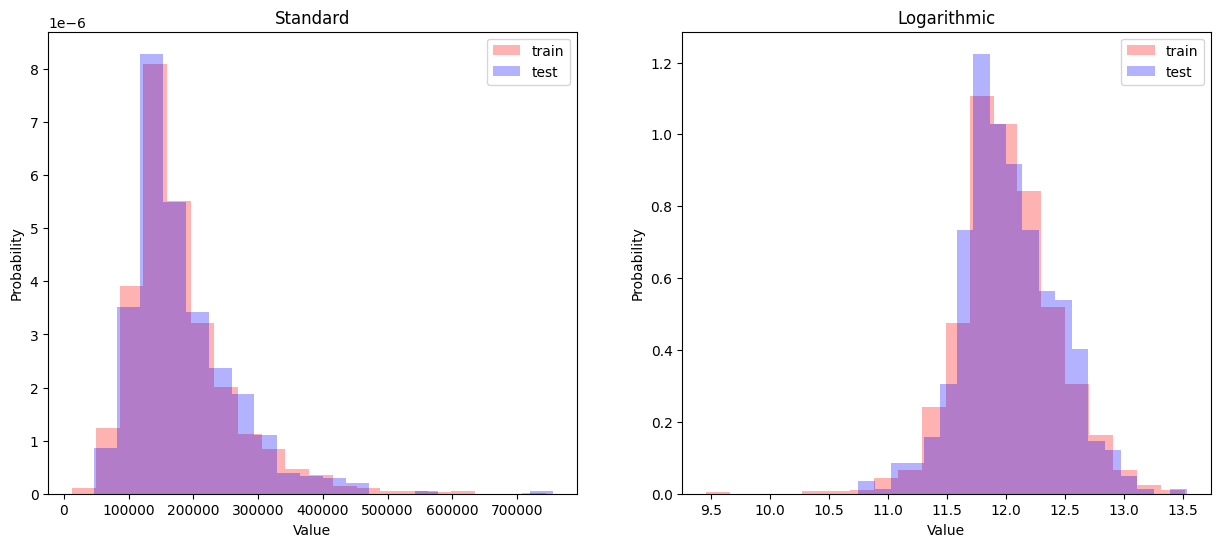

In [34]:
plot_both_distributions(y_train, y_test)

Как видно, их распределение более похоже на гауссовское. Интуиция подсказывает, что линейная регрессия с MSE должна лучше учиться на преобразованных таргетах.

**3.** Напишем класс, который во время обучения логарифмирует таргет, а во время предсказания наоборот экспоненциирует. Чтобы потом этот класс можно было использовать в [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) в следующих пунктах, у него должны быть реализованы 5 методов ([смотреть сюда](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html)):
1. ```__init__(self, *args, **kwargs)``` - все полученные аргументы передаются дальше в Ridge
2. ```fit(self, X, Y)``` - обучает класс, возвращает self
3. ```predict(self, X)``` - делает предсказание
4. ```get_params(deep=True)``` - возвращает dict с параметрами модели
5. ```set_params(**params)``` - передает нужные параметры в модель

Для этого отнаследуемся от Ridge и переопределим методы fit и predict

In [35]:
class ExponentialLinearRegression(Ridge):
    def __init__(self, alpha = 1.):
        super().__init__(alpha)

    def fit(self, X: pd.DataFrame, y: pd.Series) -> 'ExponentialLinearRegression':
        super().fit(X, np.log(y))
        return self

    def predict(self, X: pd.DataFrame) -> np.array:
        return np.exp(super().predict(X))


In [36]:
r = Ridge().fit(X_train, y_train)
elr = ExponentialLinearRegression().fit(X_train, y_train)
r_pred = r.predict(X_test)
elr_pred = elr.predict(X_test)
print(f"MAE\tClassic: {mean_absolute_error(y_test, r_pred)}\tExponential: {mean_absolute_error(y_test, elr_pred)}")
print(f"MSLE\tClassic: {root_mean_squared_logarithmic_error(y_test, r_pred)}\tExponential: {root_mean_squared_logarithmic_error(y_test, elr_pred)}")

MAE	Classic: 23821.97776100681	Exponential: 26818.699786544406
MSLE	Classic: 0.19500621233281326	Exponential: 0.21601027716185436


Иногда получается так, что разные обученные вами модели приводят к улучшению одних метрик и ухудшению других. Также зачастую случается так, что прирост по метрике не очень большой. И мы можем захотеть убедиться, что это реальное улучшение, а не просто случайная флуктуация. Для этого можно воспользоваться кросс-валидацией:

- разбиваем случайно выборку на $K$ (часто $K=5$) частей, которые называются _фолдами_
- обучаем нашу модель $K$ раз, уча на всех фолдах, кроме одного, и тестируя на оставшемся
- получаем $K$ значений метрики, которые вместе дают нам улучшенное представление о том, как ведёт себя модель на разных разбиениях на трейн и тест. В качестве итоговой метрики можно, к примеру, взять среднее полученных значений

**4.** Сравним MAE по кросс-валидации LinearRegression и ExponentialLinearRegression.

Готовое решение [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Параметр scoring в кросс-валидации — это не совсем функция-метрика, а немного более сложный объект, который можно соорудить, например, с помощью обёртки [make_scorer](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html#sklearn.metrics.make_scorer). Также с дефолтным значением параметра `cv` кросс-валидация разбивает датасет на фолды детерминированным образом. Для случайного разбиения стоит подать `sklearn.model_selection.KFold` или `sklearn.model_selection.StratifiedKFold`.

In [37]:
X_proc = np.vstack([X_train, X_test])
y_proc = pd.concat([y_train, y_test])
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(mean_absolute_error)
print(f"LR MAE:\t\t{np.mean(cross_val_score(LinearRegression(), X_proc, y_proc, cv=cv, scoring=scorer))}")
print(f"ELR MAE:\t{np.mean(cross_val_score(ExponentialLinearRegression(), X_proc, y_proc, cv=cv, scoring=scorer))}")

LR MAE:		23225.187338678435
ELR MAE:	21166.681537752724


### Подбор гиперпараметров

Линейную регрессию почти всегда можно улучшить с помощью регуляризации, но при этом возникает **гиперпараметр** — коэффициент регуляризации. Например, его можно подборирать по сетке. Зафиксируем несколько значений коэффициента регуляризации ```alpha``` и для каждого из них обучим модель и посчитаем метрику. Важно отметить, что коэффициенты регуляризации стоит перебирать по _логарифмической_ сетке. Есть два основных подхода:

*   Train-Val-Test split. Датасет делится на три части: на первой модели учатся, на второй подбираются гиперпараметры, на третьей считаются финальные метрики. Этот метод довольно шумный, зато быстрый
*   Кроссвалидация. Она значительно дольше, но надёжней

**5.** Применим последний подход с помощью [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) для подбора ```alpha```, которое максимизирует _root_mean_squared_logarithmic_error_ для _ExponentialLinearRegression_. По умолчанию `best_score_` у `GridSearchCV` - это _самое большое значение_. Чтобы не попасться в эту ловушку, изменим `greater_is_better` функции `make_scorer`

In [38]:
param_grid = {"alpha": np.logspace(-3, 3, num=7, base=10.)}
gs = GridSearchCV(ExponentialLinearRegression(), param_grid, scoring=make_scorer(root_mean_squared_logarithmic_error, greater_is_better=False))
gs.fit(X_proc, y_proc)
gs.best_params_

{'alpha': 100.0}

### Линейная модель своими руками

**6.** Реализуем линейная модель. Она делает предсказание по формуле
$$
\hat{y_i} = \langle \vec{w}, \vec{x_i} \rangle + b
$$
Здесь $\vec{w}$ и b - обучаемые параметры. $\vec{x_i}$ - вектор фичей данного примера.
$\vec{w}$ и b находятся из задачи минимизации лосс функции

$$
\vec{w}, b = {argmin}_{\vec{w}, b}(L) \ ; \ L = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^2 + \lambda \vec{w}^T\vec{w}
$$

Задачу минимизации лосс функции мы будем решать градиентным спуском. Для этого надо найти градиенты лосса по параметром модели

$$
\nabla_b L = \frac{2}{N} sum(X \vec{w} + b - \vec{y})\\
\nabla_{\vec{w}} L = \frac{2}{N} X^T(X \vec{w} + b - \vec{y}) + 2\lambda \vec{w}
$$

In [39]:
class SGDLinearRegressor(RegressorMixin):
    def __init__(self,
                 lr=0.01, regularization=1., delta_converged=1e-3, max_steps=1000,
                 batch_size=64):
        self.lr = lr
        self.regularization = regularization
        self.max_steps = max_steps
        self.delta_converged = delta_converged
        self.batch_size = batch_size

        self.W = None
        self.b = None

    def fit(self, X: np.ndarray, y: np.ndarray) -> 'SGDLinearRegressor':
        n, k = X.shape
        self.W, self.b = np.zeros(k), 0.0

        for step in range(self.max_steps):
            ind = np.random.choice(n, self.batch_size, replace=True)
            X_batch, y_batch = X[ind], y.to_numpy()[ind]
            
            error = (X_batch.dot(self.W) + self.b) - y_batch
            grad_b = (2 / self.batch_size) * np.sum(error)
            grad_W = (2 / self.batch_size) * X_batch.T.dot(error) + 2 * self.regularization * self.W
            
            prev_W = self.W.copy()
            self.W -= self.lr * grad_W
            self.b -= self.lr * grad_b
            
            delta = np.linalg.norm(self.W - prev_W)
            if delta < self.delta_converged:
                break
                
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        return X.dot(self.W) + self.b

In [40]:
sgd = SGDLinearRegressor()
sgd.fit(X_train, y_train)
prediction = sgd.predict(X_test)
print("MAE : ", mean_absolute_error(y_test, prediction))
print("Mean log : ", root_mean_squared_logarithmic_error(y_test, prediction))

MAE :  25459.779193109713
Mean log :  0.18903033664584554


### Категориальные признаки

В самом начале ноутбука мы отбросили категориальные фичи, хотя они могут помочь нам сделать модель лучше. Самый простой подход — это закодировать значения категориального признака числами от $0$ до $C-1$, где $C$ — количество значений категориального признака. Однако между значениями признака должы быть определены отношения больше/меньше (такие признаки называются _ординальными_), причём соотношения между значениями должны быть более-менее линейными. Довольно редкая ситуация, поэтому будем использовать [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). Фичу закодируем в виде $C$ столбцов, каждый из которых соответствует некоторому уникальному значению фичи. Для каждого элемента выборки будем ставить единицу в столбец, соответствующий этой фиче, и ноль в остальные. У этого метода есть недостаток: если фича принимает слишком много значений, то получится много столбцов с малым количеством информации, из-за чего модель может переобучиться.

Есть пара важных гиперпараметров, которые стоит упомянуть:
- ```handle_unknown``` - управляет обработкой незнакомых категорий на этапе `transform`. Число уникальных значений (и число столбцов) настраивается на обучающей выборке, и при дальнейшем применении может появиться значение, которого ещё не было. Если указать ```handle_unknown="ignore"```, все поля для такого объекта будут заполнены нулями.
- ```drop``` - по дефолту сумма всех столбцов обработанной фичи равна единичному вектору, но такой уже есть (свободный член). То есть признаки становятся линейно зависимыми, и это ломает процесс обучения линейной модели. Поэтому есть смысл для каждой фичи отбрасывать одну из получившихся колонок (```drop="first"```) или хотя бы делать это только для бинарных фичей (```drop="if_binary"```)

*На практике в некоторых версиях scikit-learn есть проблема с совместимостью `handle_unknown="ignore"` и `drop="first"` одновременно, поэтому вторым можно пожертвовать.

In [41]:
class OneHotPreprocessor(BaseDataPreprocessor):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.ohe = OneHotEncoder(handle_unknown="ignore", drop=None)
        self.columns = ["Overall_Qual", "Garage_Qual", "Sale_Condition", "MS_Zoning"]

    def fit(self, X: pd.DataFrame, *args) -> 'OneHotPreprocessor':
        super().fit(X, *args)
        self.ohe.fit(X[self.columns])
        return self

    def transform(self, X: pd.DataFrame) -> np.ndarray:
        return np.concatenate([
            super().transform(X),
            self.ohe.transform(X[self.columns]).toarray()
        ], axis=1)

In [48]:
data = pd.read_csv('./data.csv')
target_column = "Sale_Price"
X_train, X_test, y_train, y_test = train_test_split(
    data[data.columns.drop(target_column)],
    data[target_column],
    test_size=0.2,
    random_state=seed)

ohp = OneHotPreprocessor(needed_columns=numerical_columns).fit(X_train)
X_train = ohp.transform(X_train)
X_test = ohp.transform(X_test)

elr = ExponentialLinearRegression().fit(X_train, y_train)
y_pred = elr.predict(X_test)
print(f"MAE  {mean_absolute_error(y_test, y_pred)}")
print(f"MSLE {root_mean_squared_logarithmic_error(y_test, y_pred)}")

MAE  20837.10485040717
MSLE 0.18560982800718104


### Пайплайн

Чтобы ничего не забыть при дообучении, человечество придумало пайплайны, которые позволяют объединить предобработку данных и обучение модели в один класс - например, [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).

**7.** Напишем пайплайн, объединяющий использованную нами базовую предобработку данных (BaseDataPreprocessor и OneHotPreprocessor), а также линейную регрессию с L2-регуляризацией, и сдайте его в Контест.

In [45]:
def make_ultimate_pipeline():
    return Pipeline([
        ("ohe", OneHotPreprocessor(needed_columns=['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Year_Remod_Add', 'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces', 'Garage_Cars', 'Garage_Area', 'Wood_Deck_SF', 'Open_Porch_SF', 'Enclosed_Porch', 'Three_season_porch', 'Screen_Porch', 'Pool_Area', 'Misc_Val', 'Mo_Sold', 'Year_Sold', 'Longitude', 'Latitude'])),
        ("ridge", Ridge())
    ])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    data[data.columns.drop(target_column)],
    data[target_column],
    test_size=0.2,
    random_state=seed)

pipe = make_ultimate_pipeline().fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(f"MAE  {mean_absolute_error(y_test, y_pred)}")
print(f"MSLE {root_mean_squared_logarithmic_error(y_test, y_pred)}")

MAE  18303.66640040049
MSLE 0.15713545940502052


Что еще можно попробовать:
- Судя по гистограммам, некоторые из фичей почти всегда принимают одно значение. Для начала их можно выкинуть.
- Почистить выбросы.
- Добавить другие категориальные признаки.
- Проинтерпретировать некоторые непрерывные фичи как категориальные.
- В датасете есть координаты квартиры, по которым можно оценить расстояние до центра города.
- Вспомнить про гридсерч, и вообще про подбор гиперпараметров